# A tronbot using neat

In [1]:
import neat

In [2]:
from tronlib import *

In [3]:
# Create an evaluation function


from __future__ import print_function
import os
import neat
import visualize
import numpy as np

# If changing these, update config as well
BOARD_WIDTH = 10
BOARD_HEIGHT = 10



def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = evaluate_single_genome(genome, config)
            
def evaluate_single_genome(genome, config, n_games=3):
    score = 0
    # Play n games
    bot2 = NNBot(genome, config)
    for i in range(n_games):
        board = TronBoard(BOARD_WIDTH, BOARD_HEIGHT, (3, 4), (5, 4), (1, 0), (1, 0))
        bot1 = SimpleBot()
        game = TronGame(board, bot1, bot2, show=False)
        
        for step, state in enumerate(game):
            pass  # Game updated
        # Winning is a big deal
        if game.board.winner == 2:
            score += 10000
        
        # More score for lasting longer
        score += step
        
    return score

class NNBot:
    
    def __init__(self, genome, config):
        self.net = neat.nn.FeedForwardNetwork.create(genome, config)
    
    def decide_move(self, board, player_position):
        move_choice = np.argmax(self.net.activate(board.board.flatten()))
        return TronBoard.VALID_VECTORS[move_choice]

In [4]:
%%writefile tron.config

#--- parameters for the XOR-2 experiment ---#

[NEAT]
fitness_criterion     = max
fitness_threshold     = 500000
pop_size              = 150
reset_on_extinction   = False

[DefaultGenome]
# node activation options
activation_default      = sigmoid
activation_mutate_rate  = 0.0
activation_options      = sigmoid

# node aggregation options
aggregation_default     = sum
aggregation_mutate_rate = 0.0
aggregation_options     = sum

# node bias options
bias_init_mean          = 0.0
bias_init_stdev         = 1.0
bias_max_value          = 30.0
bias_min_value          = -30.0
bias_mutate_power       = 0.5
bias_mutate_rate        = 0.7
bias_replace_rate       = 0.1

# genome compatibility options
compatibility_disjoint_coefficient = 1.0
compatibility_weight_coefficient   = 0.5

# connection add/remove rates
conn_add_prob           = 0.5
conn_delete_prob        = 0.5

# connection enable options
enabled_default         = True
enabled_mutate_rate     = 0.01

feed_forward            = True
initial_connection      = full_direct

# node add/remove rates
node_add_prob           = 0.2
node_delete_prob        = 0.2

# network parameters
num_hidden              = 5
num_inputs              = 100
num_outputs             = 4

# node response options
response_init_mean      = 1.0
response_init_stdev     = 0.0
response_max_value      = 30.0
response_min_value      = -30.0
response_mutate_power   = 0.0
response_mutate_rate    = 0.0
response_replace_rate   = 0.0

# connection weight options
weight_init_mean        = 0.0
weight_init_stdev       = 1.0
weight_max_value        = 30
weight_min_value        = -30
weight_mutate_power     = 0.5
weight_mutate_rate      = 0.8
weight_replace_rate     = 0.1

[DefaultSpeciesSet]
compatibility_threshold = 3.0

[DefaultStagnation]
species_fitness_func = max
max_stagnation       = 20
species_elitism      = 2

[DefaultReproduction]
elitism            = 2
survival_threshold = 0.2


Overwriting tron.config


In [5]:

def run(config):

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 300)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    #winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    
    #node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    #visualize.draw_net(config, winner, True, node_names=node_names)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    p.run(eval_genomes, 50)
    return p, stats


 ****** Running generation 0 ****** 

Population's average fitness: 11.31333 stdev: 6.16023
Best fitness: 26.00000 - size: (9, 920) - species 1 - id 12
Average adjusted fitness: 0.434
Mean genetic distance 2.728, standard deviation 0.288
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   118     26.0    0.428     0
     2    0    32     24.0    0.441     0
Total extinctions: 0
Generation time: 3.809 sec

 ****** Running generation 1 ****** 

Population's average fitness: 145.76667 stdev: 1147.70006
Best fitness: 10020.00000 - size: (9, 915) - species 1 - id 226
Average adjusted fitness: 0.010
Mean genetic distance 2.544, standard deviation 0.316
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    44  10020.0    0.018     0
     2    1   106     25.0    0.001     0
Total extinctions: 0
Generation time: 3.675 sec (3

Population's average fitness: 353.09333 stdev: 2136.35840
Best fitness: 20030.00000 - size: (12, 662) - species 1 - id 2452
Average adjusted fitness: 0.018
Mean genetic distance 2.286, standard deviation 0.610
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    82  20030.0    0.021     1
     2   16    68  10041.0    0.014     0
Total extinctions: 0
Generation time: 3.887 sec (4.028 average)

 ****** Running generation 17 ****** 

Population's average fitness: 420.20000 stdev: 1960.91989
Best fitness: 10035.00000 - size: (12, 752) - species 1 - id 2563
Average adjusted fitness: 0.042
Mean genetic distance 2.278, standard deviation 0.628
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    75  10035.0    0.038     2
     2   17    75  10026.0    0.046     1
Total extinctions: 0
Generation time: 4.288 sec (4.065 avera

Population's average fitness: 1625.34667 stdev: 3668.75605
Best fitness: 10047.00000 - size: (13, 629) - species 1 - id 4795
Average adjusted fitness: 0.161
Mean genetic distance 2.231, standard deviation 0.681
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   32    75  10047.0    0.168    17
     2   32    75  10045.0    0.155     3
Total extinctions: 0
Generation time: 3.835 sec (3.706 average)

 ****** Running generation 33 ****** 

Population's average fitness: 1223.81333 stdev: 3451.51003
Best fitness: 20041.00000 - size: (14, 630) - species 1 - id 4898
Average adjusted fitness: 0.061
Mean genetic distance 2.187, standard deviation 0.710
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   33    79  20041.0    0.068    18
     2   33    71  10036.0    0.054     4
Total extinctions: 0
Generation time: 3.583 sec (3.669 ave

Population's average fitness: 1360.68667 stdev: 3774.16890
Best fitness: 20042.00000 - size: (14, 590) - species 1 - id 7112
Average adjusted fitness: 0.062
Mean genetic distance 2.364, standard deviation 0.629
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   48   103  20042.0    0.100    33
     2   48    47  10038.0    0.024     8
Total extinctions: 0
Generation time: 3.567 sec (3.616 average)

 ****** Running generation 49 ****** 

Population's average fitness: 2360.22667 stdev: 4958.90210
Best fitness: 20039.00000 - size: (10, 494) - species 2 - id 7185
Average adjusted fitness: 0.106
Mean genetic distance 2.267, standard deviation 0.649
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   49   100  20037.0    0.137    34
     2   49    50  20039.0    0.075     9
Total extinctions: 0
Generation time: 3.551 sec (3.588 ave

Population's average fitness: 2092.89333 stdev: 5076.96577
Best fitness: 20048.00000 - size: (16, 396) - species 1 - id 9405
Average adjusted fitness: 0.108
Mean genetic distance 2.196, standard deviation 0.408
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   64    80  20048.0    0.095     9
     2   64    70  20042.0    0.121     4
Total extinctions: 0
Generation time: 3.221 sec (3.268 average)
Saving checkpoint to neat-checkpoint-64

 ****** Running generation 65 ****** 

Population's average fitness: 2960.33333 stdev: 4841.00190
Best fitness: 20041.00000 - size: (10, 463) - species 2 - id 9500
Average adjusted fitness: 0.150
Mean genetic distance 2.255, standard deviation 0.492
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   65    69  10051.0    0.114    10
     2   65    81  20041.0    0.187     5
Total extinctions:


 ****** Running generation 80 ****** 

Population's average fitness: 3365.34667 stdev: 5621.77057
Best fitness: 20048.00000 - size: (15, 462) - species 1 - id 11795
Average adjusted fitness: 0.167
Mean genetic distance 2.466, standard deviation 0.535
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   80    90  20048.0    0.231    25
     2   80    60  10049.0    0.102     4
Total extinctions: 0
Generation time: 3.317 sec (3.310 average)

 ****** Running generation 81 ****** 

Population's average fitness: 2695.39333 stdev: 5501.83936
Best fitness: 20050.00000 - size: (9, 434) - species 2 - id 11859
Average adjusted fitness: 0.143
Mean genetic distance 2.401, standard deviation 0.473
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   81    71  20040.0    0.101    26
     2   81    79  20050.0    0.184     5
Total extinctions

Population's average fitness: 2364.42667 stdev: 4959.48711
Best fitness: 20051.00000 - size: (17, 431) - species 1 - id 14089
Average adjusted fitness: 0.114
Mean genetic distance 2.106, standard deviation 0.494
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   96    89  20051.0    0.138    41
     2   96    61  20048.0    0.090    20
Total extinctions: 0
Generation time: 4.480 sec (3.695 average)

 ****** Running generation 97 ****** 

Population's average fitness: 2962.92000 stdev: 5725.27863
Best fitness: 30030.00000 - size: (17, 434) - species 1 - id 14255
Average adjusted fitness: 0.094
Mean genetic distance 2.146, standard deviation 0.470
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   97    91  30030.0    0.117    42
     2   97    59  20041.0    0.072    21
Total extinctions: 0
Generation time: 4.259 sec (3.746 a

Population's average fitness: 3163.10000 stdev: 5315.87817
Best fitness: 20048.00000 - size: (8, 339) - species 2 - id 16370
Average adjusted fitness: 0.157
Mean genetic distance 2.163, standard deviation 0.442
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  112    69  20043.0    0.138    57
     2  112    81  20048.0    0.176     5
Total extinctions: 0
Generation time: 2.952 sec (3.338 average)

 ****** Running generation 113 ****** 

Population's average fitness: 3231.51333 stdev: 6150.02241
Best fitness: 20048.00000 - size: (14, 402) - species 1 - id 16533
Average adjusted fitness: 0.162
Mean genetic distance 2.184, standard deviation 0.435
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  113    74  20048.0    0.175    58
     2  113    76  20043.0    0.149     6
Total extinctions: 0
Generation time: 3.583 sec (3.378 a


Population's average fitness: 2898.04667 stdev: 5338.36565
Best fitness: 20044.00000 - size: (19, 341) - species 1 - id 18615
Average adjusted fitness: 0.145
Mean genetic distance 2.144, standard deviation 0.235
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  128    78  20044.0    0.134    73
     2  128    72  20043.0    0.156    21
Total extinctions: 0
Generation time: 2.899 sec (2.918 average)

 ****** Running generation 129 ****** 

Population's average fitness: 2963.02667 stdev: 5488.14213
Best fitness: 20048.00000 - size: (6, 255) - species 1 - id 18855
Average adjusted fitness: 0.148
Mean genetic distance 2.188, standard deviation 0.269
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  129   124  20048.0    0.142    74
     2  129    26  20047.0    0.154    22
Total extinctions: 0
Generation time: 2.563 sec (2.852 

Population's average fitness: 2562.92000 stdev: 5063.34448
Best fitness: 20046.00000 - size: (7, 254) - species 2 - id 21062
Average adjusted fitness: 0.119
Mean genetic distance 1.984, standard deviation 0.425
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  144   106  20042.0    0.139     8
     2  144    44  20046.0    0.099    37
Total extinctions: 0
Generation time: 2.188 sec (2.477 average)
Saving checkpoint to neat-checkpoint-144

 ****** Running generation 145 ****** 

Population's average fitness: 2761.11333 stdev: 5285.67221
Best fitness: 20045.00000 - size: (4, 234) - species 2 - id 21319
Average adjusted fitness: 0.158
Mean genetic distance 1.969, standard deviation 0.381
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  145    81  20041.0    0.109     9
     2  145    69  20045.0    0.206    38
Total extinction


 ****** Running generation 160 ****** 

Population's average fitness: 2899.67333 stdev: 5081.54950
Best fitness: 20045.00000 - size: (6, 240) - species 1 - id 23421
Average adjusted fitness: 0.141
Mean genetic distance 2.194, standard deviation 0.384
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  160   106  20045.0    0.154    24
     2  160    44  20035.0    0.129    53
Total extinctions: 0
Generation time: 2.467 sec (2.536 average)

 ****** Running generation 161 ****** 

Population's average fitness: 3435.10667 stdev: 5758.58928
Best fitness: 30046.00000 - size: (6, 226) - species 1 - id 23640
Average adjusted fitness: 0.103
Mean genetic distance 2.116, standard deviation 0.430
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  161   103  30046.0    0.130    25
     2  161    47  20047.0    0.077    54
Total extinction

Population's average fitness: 3768.03333 stdev: 5608.34105
Best fitness: 20045.00000 - size: (4, 207) - species 1 - id 25769
Average adjusted fitness: 0.183
Mean genetic distance 1.931, standard deviation 0.364
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  176   103  20045.0    0.194    40
     2  176    47  20036.0    0.172     3
Total extinctions: 0
Generation time: 2.457 sec (2.524 average)

 ****** Running generation 177 ****** 

Population's average fitness: 3835.40000 stdev: 6398.75684
Best fitness: 30030.00000 - size: (11, 244) - species 2 - id 25855
Average adjusted fitness: 0.138
Mean genetic distance 1.882, standard deviation 0.379
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  177    92  20045.0    0.111    41
     2  177    58  30030.0    0.164     4
Total extinctions: 0
Generation time: 2.606 sec (2.535 a

Mean genetic distance 2.227, standard deviation 0.472
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  191    93  30043.0    0.151     1
     3    7    57  20046.0    0.097     5
Total extinctions: 0
Generation time: 2.567 sec (2.493 average)

 ****** Running generation 192 ****** 

Population's average fitness: 3566.48667 stdev: 6448.80704
Best fitness: 30039.00000 - size: (11, 237) - species 2 - id 28096
Average adjusted fitness: 0.113
Mean genetic distance 2.203, standard deviation 0.384
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  192    76  30039.0    0.137     2
     3    8    74  20051.0    0.089     0
Total extinctions: 0
Generation time: 2.429 sec (2.483 average)

 ****** Running generation 193 ****** 

Population's average fitness: 3030.65333 stdev: 5391.32090
Best fitness: 20049.00000 - size: (12, 230) - spe

Population's average fitness: 3367.86000 stdev: 5622.02844
Best fitness: 30044.00000 - size: (12, 198) - species 3 - id 30247
Average adjusted fitness: 0.108
Mean genetic distance 2.148, standard deviation 0.323
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  207    57  10051.0    0.098    17
     3   23    93  30044.0    0.119    12
Total extinctions: 0
Generation time: 2.478 sec (2.532 average)

 ****** Running generation 208 ****** 

Population's average fitness: 4101.85333 stdev: 6942.09224
Best fitness: 30043.00000 - size: (12, 216) - species 2 - id 30388
Average adjusted fitness: 0.148
Mean genetic distance 2.148, standard deviation 0.362
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  208   125  30043.0    0.194    18
     3   24    25  30039.0    0.101    13
Total extinctions: 0
Generation time: 2.451 sec (2.516 

Population's average fitness: 4633.41333 stdev: 7273.60568
Best fitness: 30042.00000 - size: (6, 181) - species 2 - id 32644
Average adjusted fitness: 0.155
Mean genetic distance 2.311, standard deviation 0.546
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  223    73  30042.0    0.163    33
     3   39    77  30037.0    0.147     8
Total extinctions: 0
Generation time: 2.406 sec (2.408 average)

 ****** Running generation 224 ****** 

Population's average fitness: 4233.92667 stdev: 6665.17606
Best fitness: 30046.00000 - size: (6, 181) - species 2 - id 32644
Average adjusted fitness: 0.141
Mean genetic distance 2.310, standard deviation 0.504
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  224    72  30046.0    0.147    34
     3   40    78  20045.0    0.135     9
Total extinctions: 0
Generation time: 2.380 sec (2.399 av

Population's average fitness: 4835.38667 stdev: 6905.40538
Best fitness: 30042.00000 - size: (9, 197) - species 3 - id 35015
Average adjusted fitness: 0.159
Mean genetic distance 2.161, standard deviation 0.411
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  239    37  20046.0    0.140    49
     3   55   113  30042.0    0.178    24
Total extinctions: 0
Generation time: 2.255 sec (2.363 average)
Saving checkpoint to neat-checkpoint-239

 ****** Running generation 240 ****** 

Population's average fitness: 3635.50000 stdev: 6145.32442
Best fitness: 20049.00000 - size: (4, 171) - species 3 - id 35171
Average adjusted fitness: 0.171
Mean genetic distance 2.052, standard deviation 0.477
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  240    49  20048.0    0.150    50
     3   56   101  20049.0    0.191    25
Total extinction


 ****** Running generation 255 ****** 

Population's average fitness: 3834.48667 stdev: 6294.49516
Best fitness: 20048.00000 - size: (7, 167) - species 3 - id 37271
Average adjusted fitness: 0.180
Mean genetic distance 2.253, standard deviation 0.378
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  255    55  20043.0    0.131    65
     3   71    95  20048.0    0.229     4
Total extinctions: 0
Generation time: 2.301 sec (2.373 average)

 ****** Running generation 256 ****** 

Population's average fitness: 4502.79333 stdev: 6591.10177
Best fitness: 30044.00000 - size: (9, 166) - species 2 - id 37387
Average adjusted fitness: 0.150
Mean genetic distance 2.200, standard deviation 0.426
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  256    55  30044.0    0.152    66
     3   72    95  20047.0    0.148     5
Total extinction

Population's average fitness: 4436.42000 stdev: 6273.33683
Best fitness: 20049.00000 - size: (4, 158) - species 2 - id 39596
Average adjusted fitness: 0.222
Mean genetic distance 2.318, standard deviation 0.549
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  271    82  20049.0    0.220    81
     3   87    68  20041.0    0.223    20
Total extinctions: 0
Generation time: 2.332 sec (2.236 average)

 ****** Running generation 272 ****** 

Population's average fitness: 3634.91333 stdev: 6144.77966
Best fitness: 30041.00000 - size: (5, 157) - species 2 - id 39807
Average adjusted fitness: 0.119
Mean genetic distance 2.499, standard deviation 0.624
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  272    94  30041.0    0.139    82
     3   88    56  20046.0    0.099    21
Total extinctions: 0
Generation time: 2.225 sec (2.230 av

Mean genetic distance 2.208, standard deviation 0.450
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3  102    89  30046.0    0.146    35
     4   11    61  30040.0    0.226     5
Total extinctions: 0
Generation time: 2.190 sec (2.168 average)

 ****** Running generation 287 ****** 

Population's average fitness: 3167.01333 stdev: 5907.58033
Best fitness: 30036.00000 - size: (6, 161) - species 3 - id 41821
Average adjusted fitness: 0.100
Mean genetic distance 2.139, standard deviation 0.406
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3  103    96  30036.0    0.128    36
     4   12    54  10050.0    0.072     6
Total extinctions: 0
Generation time: 2.196 sec (2.183 average)

 ****** Running generation 288 ****** 

Population's average fitness: 3365.73333 stdev: 5623.51145
Best fitness: 30048.00000 - size: (5, 149) - speci

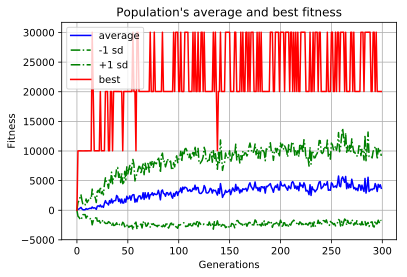

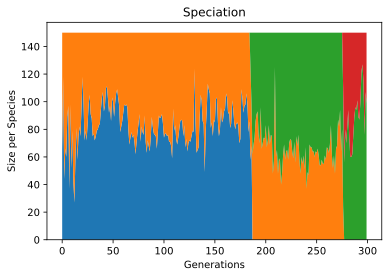

Mean genetic distance 2.432, standard deviation 0.553
Mean genetic distance 2.354, standard deviation 0.515
Mean genetic distance 2.410, standard deviation 0.551
Mean genetic distance 2.333, standard deviation 0.471
Mean genetic distance 2.326, standard deviation 0.386
Mean genetic distance 2.382, standard deviation 0.360
Mean genetic distance 2.306, standard deviation 0.435
Mean genetic distance 2.196, standard deviation 0.558
Mean genetic distance 2.124, standard deviation 0.578
Mean genetic distance 2.073, standard deviation 0.522
Mean genetic distance 2.069, standard deviation 0.517
Mean genetic distance 2.170, standard deviation 0.489
Mean genetic distance 2.214, standard deviation 0.497
Mean genetic distance 2.294, standard deviation 0.487
Mean genetic distance 2.176, standard deviation 0.395
Mean genetic distance 2.119, standard deviation 0.389
Mean genetic distance 2.206, standard deviation 0.415
Mean genetic distance 2.163, standard deviation 0.336
Mean genetic distance 2.021,

In [6]:
# Load configuration.
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     "tron.config")

p, stats = run(config)

In [8]:
anim = main()
from IPython.display import HTML
HTML(anim.to_html5_video())

# Parallel (Python 2 only!)

In [7]:
import pickle
import zlib

import pp
# list of available servers
#servers = ("server1:port1, "server2:port2", "server3:port3")
servers = () # empty: run local
# you can set the number of CPUs the local machine will use
# if you set ncpus = 0, then only distributed workers will
# receive and do the job
job_server = pp.Server(ncpus=4, ppservers=servers)  #, loglevel=20)
print("Starting pp with", job_server.get_ncpus(), "workers")



def parallel_evaluate(genomes, config):
    # number of chunks (jobs)
    num_chunks = 2
    # size for each subpopulation
    size = config.pop_size/num_chunks
    # make sure we have a proper number of chunks
    assert config.pop_size % num_chunks == 0, "Population size is not multiple of num_chunks"

    jobs = []
    for k in xrange(num_chunks):
        # divide the population in chunks and evaluate each chunk on a
        # different processor or machine
        print ('Chunk %d:  [%3d:%3d]' %(k, size*k, size*(k+1)))

        # compressing the population is useful when running
        # on a network of machines over the internet
        # It drastically reduces the lag at minimal cost
        # zlib compression (for small chromosomes)
        #           ratio             ratio
        # level   protocol=0 (note that protocol 1 or 2 are even better)
        #   1       74.06%
        #   3       77.21%
        #   6       79.68%
        #   9       80.58%

        # first pickles the population object
        pickle_pop = pickle.dumps((genomes[size*k:size*(k+1)], config), 2)
        # then compress the pickled object
        compressed_pop = zlib.compress(pickle_pop, 3)
        #print "Ratio: ", len(pickle_pop), len(compressed_pop)
        # submit the job
        jobs.append(job_server.submit(parallel_evaluation,
                                      args=(compressed_pop, k),
                                      depfuncs=(),
                                      modules=('neat','zlib','math')))

    all_jobs =[] # the results for all jobs
    for k in xrange(num_chunks):
        all_jobs += (jobs[k]())
    # assign the fitness back to each chromosome
    for i, fitness in enumerate(all_jobs):
        if not fitness:
            fitness = -1
        genomes[i][1].fitness = fitness


def parallel_evaluation(compressed_pop, chunk, n_games=20):
    # This function will run in parallel
    from tronlib import TronBoard, TronGame, SimpleBot, NNBot

    # don't print OS calls to stdout:
    #http://www.parallelpython.com/component/option,com_smf/Itemid,29/topic,103.0
    print("Evaluating chunk %d at %s" %(chunk, os.popen("hostname").read()))

    # decompress the pickled object
    decompress_pop = zlib.decompress(compressed_pop)
    # unpickle it
    sub_pop, config = pickle.loads(decompress_pop)

    # XOR-2
    INPUTS = ((0, 0), (0, 1), (1, 0), (1, 1))
    OUTPUTS = (0, 1, 1, 0)

    fitness = []
    for genome_num, genome in sub_pop:
        score = 0
        # Play n games
        bot2 = NNBot(genome, config)
        for i in range(n_games):
            board = TronBoard(10, 10, (3, 4), (5, 4), (1, 0), (1, 0))
            bot1 = SimpleBot()
            game = TronGame(board, bot1, bot2, show=False)

            step = 0
            while not game.board.gameover:
                game.update()
                step += 1
            # Winning is a big deal
            if game.board.winner == 2:
                score += 10000

            # More score for lasting longer
            score += step
        if score:
            fitness.append(score)
        else:
            fitness.append(-1)
    # when finished, return the list of fitness values
    return fitness
        

def run_parallel(config):

    
    
    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    p.run(parallel_evaluate, 50)
    #visualize.draw_ff(pop.stats[0][-1])
    job_server.print_stats()
    
    return p

ModuleNotFoundError: No module named 'pp'

In [ ]:
# Load configuration.
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     "tron.config")

p = run_parallel(config)

In [ ]:
import random
from tronlib import *

def main():
    best_bot = NNBot(p.best_genome, config)

    board = TronBoard(10, 10, (3, 4), (5, 4), (1, 0), (1, 0))
    bot1 = SimpleBot()
    game = TronGame(board, bot1, best_bot, show=True)

    last_board = game.board.board

    def init():
        im.set_data(game.board.board)
        return (im,)


    def animate(i):
        global last_board
        if game.board.gameover:
            data = last_board
        else:
            game.update()
            data = game.board.board
        im.set_array(data)
        last_board = data
        return (im,)

    fig = plt.figure()
    x, y = game.board.board.shape
    #ax = plt.axes(xlim=(0, x), ylim=(0, y))
    #line, = ax.plot([], [], lw=2)
    im=plt.imshow(game.board.board,interpolation='nearest')

    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)

    return anim

In [ ]:
pickle.dump(p.best_genome, open('best.genome', 'wb'))

In [ ]:
anim = main()
from IPython.display import HTML
HTML(anim.to_html5_video())